In [1]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sb
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.neighbors import KNeighborsClassifier
%matplotlib inline

In [2]:
import os
os.getcwd()

'/Users/naoki/Desktop/DIC/Sprint/Sprint2'

#### 【問題1】train_test_splitのスクラッチ
まずはスクラッチの練習として、scikit-learnのtrain_test_splitを自作してみましょう。Jupyter Notebookでコーディングを進め、完成後はpyファイルとします。utilsディレクトリの中にsplit.pyを作ってください。

In [3]:
import sys
sys.path.append("/Users/naoki/Desktop/DIC/Sprint/utils/")

In [4]:
import numpy as np 
from utils.split import train_test_split

x = np.array([i for i in range(12)]).reshape(6,2)
y = np.array([i for i in range(10, 16)])
y = y.reshape(len(y), 1)

print("x input")
print(x)
print("y input")
print(y)
x_train, x_test, y_train, y_test = train_test_split(x, y, 0.5)
print("x train")
print(x_train)
print("x test")
print(x_test)
print("y train")
print(y_train)
print("y test")
print(y_test)

x input
[[ 0  1]
 [ 2  3]
 [ 4  5]
 [ 6  7]
 [ 8  9]
 [10 11]]
y input
[[10]
 [11]
 [12]
 [13]
 [14]
 [15]]
x train
[[ 4  5]
 [ 0  1]
 [10 11]]
x test
[[6 7]
 [2 3]
 [8 9]]
y train
[12 10 15]
y test
[13 11 14]


#### 【問題2】 分類パイプラインの作成
分類は3種類の手法を扱います。pyファイルで実行できる分類のパイプラインを作成してください。  
ロジスティック回帰  
SVM  
決定木  

データセットは3種類用意します。3つのデータセットが引数により切り替えられるようにしてください。
1つ目は事前学習期間同様にirisデータセットです。
sklearn.datasets.load_iris — scikit-learn 0.20.2 documentation
2値分類としたいため、以下の2つの目的変数のみ利用します。特徴量は4種類全て使います。
virgicolorとvirginica
また、残り2つは可視化が可能な特徴量が2つのデータセットを人工的に用意します。以下のコードで説明変数X,目的変数yが作成可能です。「シンプルデータセット1」「シンプルデータセット2」とします。

In [5]:
import numpy as np 
from utils.sprint2_pipeline import pipeline_classifier

In [6]:
from sklearn.datasets import load_iris

In [7]:
iris_data_set = load_iris()
X = pd.DataFrame(iris_data_set.data, columns=iris_data_set.feature_names)    #Put explanatory variable into x as pandasdata frame
Y = pd.DataFrame(iris_data_set.target, columns=['Species'])    #Put iris response variable into y as pandasdata frame
df = pd.concat([X, Y], axis=1)

In [8]:
selected_feature_name = X.columns.values
df = df[df["Species"] != 0]
X = df[selected_feature_name]
Y = df["Species"]

#### Irisデータに対して予想を行う

In [9]:
#ロジスティック回帰
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(random_state=30, solver='lbfgs', multi_class='multinomial')

#pipelineパラメーター
params_ext = {
            "split_test_size" : 0.25,
            "split_random_state" : 42,
            "normalization_on": True,
            "roc_plot_on": False,
            "cv_on": False,
            "cv_split": 5,
            "cv_random_state" : None,
            "cv_shuffle" : True,
            "grid_search_on" : True,
            "grid_search_samples" : "All",
            "result_format" : "predict_as_binary"
        }
#Grid search
param_grid = {
            "hyper_param":{
                'C' : [0.001, 0.01, 0.1, 1, 10, 100],
                'tol' : [1e-3, 1e-4, 1e-5]
            },
            "grid_search_param":{
                    "grid_search_cv":2
            }
        }

result, answer, fpr, tpr, auc = pipeline_classifier(
                                    clf, X.values, Y.values, "Species", selected_feature_name, 2, 
                                    params=params_ext, 
                                    params_grid=param_grid)


print("Result(Pridiction)=")
print(result)
print("Answer=")
print(answer.reshape(-1))

Split data train & test
元データ数：100　学習データ数：75　検証データ数：25
Normalize feature data
Run GridSearch with 75 samples
Set best params  {'C': 100, 'tol': 0.001}
Result Format = binary
Result(Pridiction)=
[2 2 2 1 1 1 2 2 1 1 2 1 2 2 2 1 2 2 1 1 2 2 1 1 2]
Answer=
[2 2 2 1 1 1 1 2 1 1 1 1 2 1 2 1 2 2 1 1 2 2 1 1 2]


/Users/naoki/.pyenv/versions/anaconda3-4.3.0/lib/python3.6/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [10]:
#SVM
from sklearn.svm import SVC
clf = SVC()

#pipelineパラメーター
params_ext = {
            "split_test_size" : 0.25,
            "split_random_state" : 42,
            "normalization_on": True,
            "roc_plot_on": False,
            "cv_on": False,
            "cv_split": 5,
            "cv_random_state" : None,
            "cv_shuffle" : True,
            "grid_search_on" : False,
            "grid_search_samples" : (int)(len(df.index)*0.75),
            "result_format" : "predict_as_binary"
        }
#Grid search
param_grid = {
            "hyper_param":{
                'C' : [0.001, 0.01, 0.1, 1, 10, 100],
                'tol' : [1e-3, 1e-4, 1e-5]
            },
            "grid_search_param":{
                    "grid_search_cv":2
            }
        }

selected_feature_name = X.columns.values

result, answer, fpr, tpr, auc = pipeline_classifier(
                                    clf, X.values, Y.values, "Species", selected_feature_name, 2, 
                                    params=params_ext, 
                                    params_grid=param_grid)

print("Result(Pridiction)=")
print(result)
print("Answer=")
print(answer.reshape(-1))

Split data train & test
元データ数：100　学習データ数：75　検証データ数：25
Normalize feature data
Result Format = binary
Result(Pridiction)=
[2 2 2 1 1 1 2 2 1 1 2 1 2 2 2 1 2 2 1 1 2 2 1 1 2]
Answer=
[2 2 2 1 1 1 1 2 1 1 1 1 2 1 2 1 2 2 1 1 2 2 1 1 2]


In [11]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(max_depth=10)

#pipelineパラメーター
params_ext = {
            "split_test_size" : 0.25,
            "split_random_state" : 42,
            "normalization_on": True,
            "roc_plot_on": False,
            "cv_on": False,
            "cv_split": 5,
            "cv_random_state" : None,
            "cv_shuffle" : True,
            "grid_search_on" : False,
            "grid_search_samples" : (int)(len(df.index)*0.75),
            "result_format" : "predict_as_binary"
        }
#Grid search
param_grid = {
            "hyper_param":{
                'max_depth' : [3, 10, 20],
            },
            "grid_search_param":{
                    "grid_search_cv":2
            }
        }

selected_feature_name = X.columns.values

result, answer, fpr, tpr, auc = pipeline_classifier(
                                    clf, X.values, Y.values, "Species", selected_feature_name, 2, 
                                    params=params_ext, 
                                    params_grid=param_grid)

print("Result(Pridiction)=")
print(result)
print("Answer=")
print(answer.reshape(-1))

Split data train & test
元データ数：100　学習データ数：75　検証データ数：25
Normalize feature data
Result Format = binary
Result(Pridiction)=
[2 2 2 1 1 1 2 2 1 1 2 1 2 2 2 1 2 2 1 1 2 2 1 1 2]
Answer=
[2 2 2 1 1 1 1 2 1 1 1 1 2 1 2 1 2 2 1 1 2 2 1 1 2]


#### シンプルデータセット1作成コード

In [12]:
import numpy as np

np.random.seed(seed=0)
n_samples = 500
f0= [-1, 2]
f1 = [2, -1]
cov = [[1.0,0.8], [0.8, 1.0]]

f0 = np.random.multivariate_normal(f0, cov, int(n_samples/2))
f1 = np.random.multivariate_normal(f1, cov, int(n_samples/2))

X = np.concatenate((f0, f1))
y = np.concatenate((np.ones((int(n_samples/2))), np.ones((int(n_samples/2))) *(-1))).astype(np.int)

random_index = np.random.permutation(np.arange(n_samples))
X = X[random_index]
Y = y[random_index]

In [13]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(max_depth=10)

#pipelineパラメーター
params_ext = {
            "split_test_size" : 0.25,
            "split_random_state" : 42,
            "normalization_on": True,
            "roc_plot_on": True,
            "cv_on": False,
            "cv_split": 5,
            "cv_random_state" : None,
            "cv_shuffle" : True,
            "grid_search_on" : False,
            "grid_search_samples" : (int)(len(X)*0.75),
            "result_format" : "predict_as_probability"
        }
#Grid search
param_grid = {
            "hyper_param":{
                'max_depth' : [3, 10, 20],
            },
            "grid_search_param":{
                    "grid_search_cv":2
            }
        }

selected_feature_name = ["A", "B"]
result, answer, fpr, tpr, auc = pipeline_classifier(
                                    clf, X, Y, "TARGET", selected_feature_name, 1, 
                                    params=params_ext, 
                                    params_grid=param_grid)

print("Result(Pridiction)=")
print(result)
print("Answer=")
print(answer)

Split data train & test
元データ数：500　学習データ数：375　検証データ数：125
Normalize feature data
Result Format = binary
Result(Pridiction)=
[-1  1  1  1  1  1 -1  1 -1 -1 -1  1 -1  1 -1  1 -1  1  1 -1  1  1 -1 -1
 -1 -1  1  1 -1 -1  1  1  1  1  1 -1  1 -1 -1  1  1 -1 -1 -1 -1 -1 -1  1
  1 -1 -1 -1  1 -1 -1 -1  1 -1 -1  1 -1 -1  1 -1  1 -1 -1  1  1 -1  1  1
 -1 -1 -1  1 -1 -1  1  1  1  1  1 -1  1 -1 -1  1  1  1 -1 -1 -1 -1 -1  1
 -1  1  1  1 -1 -1  1 -1  1  1  1 -1  1  1  1 -1  1 -1 -1  1 -1 -1  1 -1
 -1 -1  1  1 -1]
Answer=
[-1  1  1  1  1  1 -1  1 -1 -1 -1  1 -1  1 -1  1 -1  1  1 -1  1  1 -1 -1
 -1 -1  1  1 -1 -1  1  1  1  1  1 -1  1 -1 -1  1  1 -1 -1 -1 -1 -1 -1  1
  1 -1 -1 -1  1 -1 -1 -1  1 -1 -1  1 -1 -1  1 -1  1 -1 -1  1  1 -1  1  1
 -1 -1 -1  1 -1 -1  1  1  1  1  1 -1  1 -1 -1  1  1  1 -1 -1 -1 -1 -1  1
 -1  1  1  1 -1 -1  1 -1  1  1  1 -1  1  1  1 -1  1 -1 -1  1 -1 -1  1 -1
 -1 -1  1  1 -1]


#### シンプルデータセット2作成コード

In [14]:
X = np.array([[-0.44699 , -2.8073  ],[-1.4621  , -2.4586  ],
       [ 0.10645 ,  1.9242  ],[-3.5944  , -4.0112  ],
       [-0.9888  ,  4.5718  ],[-3.1625  , -3.9606  ],
       [ 0.56421 ,  0.72888 ],[-0.60216 ,  8.4636  ],
       [-0.61251 , -0.75345 ],[-0.73535 , -2.2718  ],
       [-0.80647 , -2.2135  ],[ 0.86291 ,  2.3946  ],
       [-3.1108  ,  0.15394 ],[-2.9362  ,  2.5462  ],
       [-0.57242 , -2.9915  ],[ 1.4771  ,  3.4896  ],
       [ 0.58619 ,  0.37158 ],[ 0.6017  ,  4.3439  ],
       [-2.1086  ,  8.3428  ],[-4.1013  , -4.353   ],
       [-1.9948  , -1.3927  ],[ 0.35084 , -0.031994],
       [ 0.96765 ,  7.8929  ],[-1.281   , 15.6824  ],
       [ 0.96765 , 10.083   ],[ 1.3763  ,  1.3347  ],
       [-2.234   , -2.5323  ],[-2.9452  , -1.8219  ],
       [ 0.14654 , -0.28733 ],[ 0.5461  ,  5.8245  ],
       [-0.65259 ,  9.3444  ],[ 0.59912 ,  5.3524  ],
       [ 0.50214 , -0.31818 ],[-3.0603  , -3.6461  ],
       [-6.6797  ,  0.67661 ],[-2.353   , -0.72261 ],
       [ 1.1319  ,  2.4023  ],[-0.12243 ,  9.0162  ],
       [-2.5677  , 13.1779  ],[ 0.057313,  5.4681  ]])
Y = np.array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [15]:
print(X.shape)
print(y.shape)
#X = X.reshape(X.shape[0], X.shape[1])
#y = y.reshape(y.shape[0], 1)

(40, 2)
(500,)


In [16]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(max_depth=10)

#pipelineパラメーター
params_ext = {
            "split_test_size" : 0.25,
            "split_random_state" : 42,
            "normalization_on": True,
            "roc_plot_on": False,
            "cv_on": False,
            "cv_split": 5,
            "cv_random_state" : None,
            "cv_shuffle" : True,
            "grid_search_on" : True,
            "grid_search_samples" : (int)(len(X)*0.75),
            "result_format" : "predict_as_binary"
        }
#Grid search
param_grid = {
            "hyper_param":{
                'max_depth' : [3, 10, 20],
            },
            "grid_search_param":{
                    "grid_search_cv":2
            }
        }

selected_feature_name = ["A", "B"]
result, answer, fpr, tpr, auc = pipeline_classifier(
                                    clf, X, Y, "TARGET", selected_feature_name, 2,
                                    params=params_ext, 
                                    params_grid=param_grid)

print("Result(Pridiction)=")
print(result)
print("Answer=")
print(answer)

Split data train & test
元データ数：40　学習データ数：30　検証データ数：10
Normalize feature data
Run GridSearch with 30 samples
Set best params  {'max_depth': 3}
Result Format = binary
Result(Pridiction)=
[0 0 1 0 1 1 1 1 1 0]
Answer=
[0 0 0 1 0 0 1 1 1 0]


#### 【問題3】 回帰パイプラインの作成
回帰は1種類を扱います。pyファイルで実行できる回帰のパイプラインを作成してください。
線形回帰
データセットは事前学習期間同様にHouse Pricesコンペティションのものを使います。
House Prices: Advanced Regression Techniques
train.csvをダウンロードし、目的変数としてSalePrice、説明変数として、GrLivAreaとYearBuiltを使います。

In [17]:
from utils.sprint2_pipeline_regression import pipeline_regression

In [18]:
tmp = pd.read_csv("/Users/naoki/Desktop/DIC/kaggle/housing_price/train.csv")
x = tmp[["GrLivArea", "YearBuilt"]]
y = tmp[["SalePrice"]]
target_value = y.columns
feature_value = x.columns

In [19]:
#線形回帰
from sklearn.linear_model import LinearRegression
model = LinearRegression()

#pipelineパラメーター
params_ext = {
            "split_test_size" : 0.25,
            "split_random_state" : 42,
            "normalization_on": True,
            "plot_on": False,
            "plot_feature_value": feature_value,
            "grid_search_on" : True,
            "grid_search_samples" : "All",
        }
#Grid search
param_grid = {
            "hyper_param":{
                "fit_intercept":[True, False]
            },
            "grid_search_param":{
                    "grid_search_cv":2
            }
        }

result, answer = pipeline_regression(model, x, y, target_value, feature_value, 
                                          params=params_ext, 
                                          params_grid=param_grid)


answer["Prediction"] = result
print("Result\n")
print(answer)

Split data train & test
元データ数：1460　学習データ数：1095　検証データ数：365
Normalize feature data
Run GridSearch with 1095 samples
Set best params  {'fit_intercept': True}
mean square error=48107.116242061864
Result

      SalePrice     Prediction
892      154500  134376.937293
1105     325000  314865.804582
413      115000   90458.615249
522      159000  172484.972066
1036     315500  235291.737410
614       75500  103294.021550
218      311500  190787.873448
1160     146000  187540.539355
649       84500  101062.758104
887      135500  155965.971195
576      145000  133730.632726
1252     130000  121740.532797
1061      81000   86802.475955
567      214000  223964.234693
1108     181000  234054.580390
1113     134500  117587.250031
168      183500  241333.792298
1102     135000  137226.749162
1120     118400   81146.961180
67       226000  217590.790939
1040     155000  196691.929873
453      210000  233590.684116
670      173500  219540.385882
1094     129000  114174.101158
192      192000  208621.5

/Users/naoki/.pyenv/versions/anaconda3-4.3.0/lib/python3.6/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/Users/naoki/Desktop/DIC/Sprint/Sprint2/utils/sprint2_pipeline_regression.py:94: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  train_feature = scaler.transform(train_feature)
/Users/naoki/.pyenv/versions/anaconda3-4.3.0/lib/python3.6/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/Users/naoki/Desktop/DIC/Sprint/Sprint2/utils/sprint2_pipeline_regression.py:96: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  test_feature = scaler.transform(test_feature)
/Users/naoki/.pyenv/versions/anaconda3-4.3.0/lib/python3.6/s

TEST

In [20]:
import math

def plot_result2(result, test_target, test_feature, feature_value, target_value):

    num_of_row = math.ceil(len(feature_value) / 2)
    num_of_col = 2 if len(feature_value) > 1 else 1

    fig = plt.figure(figsize=(15, (5 * num_of_row)))
    ax = [0 for _ in range(0, len(feature_value))]
    for i in range(0, len(feature_value)):
        row = math.floor(i / 2)
        col = i % 2
        print(len(feature_value), row, col, num_of_row, num_of_col)
        ax[i] = plt.subplot2grid((num_of_row, num_of_col), (row, col))
        ax[i].set_title('{} vs {}'.format(feature_value[i], target_value))
        ax[i].set_xlabel('{}'.format(feature_value[i]))
        ax[i].set_ylabel('{}'.format(target_value))
        ax[i].grid(True)
        ax[i].scatter(test_feature[feature_value[i]], result, s=50, color="Red", marker='*', label="predicted")
        ax[i].scatter(test_feature[feature_value[i]], test_target, s=30, color="Blue", marker='+', label="train data")
        ax[i].legend(fontsize=15)

3 0 0 2 2
3 0 1 2 2
3 1 0 2 2


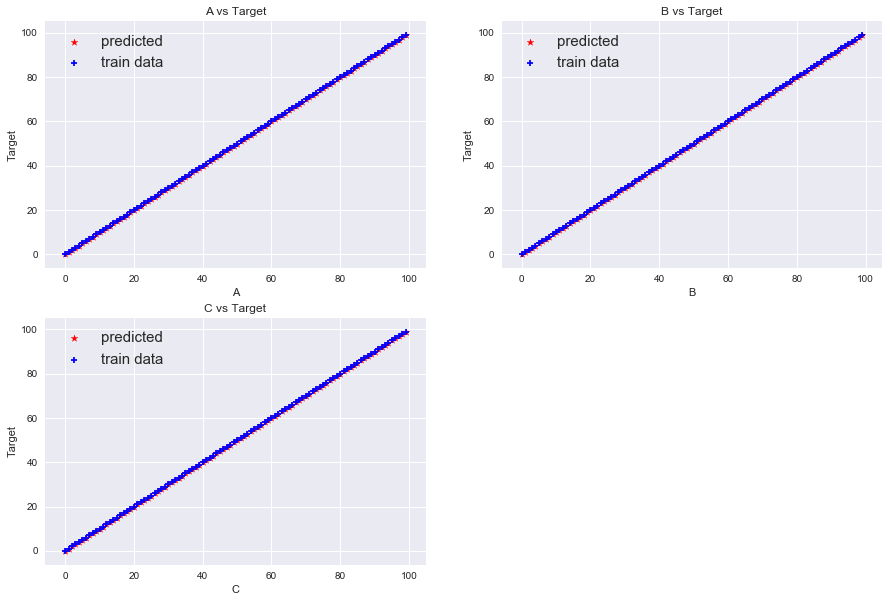

In [21]:
feature_value = ["A", "B", "C"]
target_value = "Target"
result = [i for i in range(0,100)]
test_target = [i for i in range(0,100)]
A = [[i for i in range(0,100)]]
B = [[i for i in range(0,100)]]
C = [[i for i in range(0,100)]]
D = [[i for i in range(0,100)]]
tmp1 = np.concatenate([A, B]).T
tmp2 = np.array(C).T
#tmp2 = np.concatenate([C, D]).T
test_feature = np.concatenate([tmp1, tmp2], axis=1)
test_feature = pd.DataFrame(data=test_feature, columns=feature_value)
#print(test_feature)
plot_result2(result, test_target, test_feature, feature_value, target_value)